# Exercise 11: The beauty of kNN

In this exercise, you'll gain practice working with kNN. We'll use the [diamonds](https://ggplot2.tidyverse.org/reference/diamonds.html) dataset, which comes as part of `ggplot2`. This dataset provides information on the quality and price of 50,000 diamonds


1. data plotting and train/test sets 2/2
2. knn 3/3
3. for loop 3/3
4. standardizing predictors 2/2

## 1. Data, Plotting, and Train/Test Sets (2 pts)
-----
* Load the the `class` and `tidyverse` packages.
* Assign the `diamonds` data set to a simpler name. Then, create a new variable `price_bin` that splits the `price` variable into a binary variable, where 1 indicates that the diamond costs greater than the mean price, and 0 indicates that the diamond costs less than the mean price. Set `price_bin` to be a factor. (*Hint: use the if_else() function*)
* Select just the `carat`, `depth`, `table`, `x`, `y`, and your new `price_bin` variables
* Print the first few lines of the data set
* Print the dimensions of the data set


In [ ]:
install.packages('class')
library(class)
library(tidyverse)
data <- ggplot2::diamonds
data <- data %>%
  mutate(price_bin = factor(if_else(price > mean(price), 1, 0)))
data <- data %>%
  select(carat, depth, table, x, y, price_bin)
head(data)
dim(data)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


carat,depth,table,x,y,price_bin
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.23,61.5,55,3.95,3.98,0
0.21,59.8,61,3.89,3.84,0
0.23,56.9,65,4.05,4.07,0
0.29,62.4,58,4.20,4.23,0
0.31,63.3,58,4.34,4.35,0
0.24,62.8,57,3.94,3.96,0


[1] 53940     6

### Plot
Create a scatterplot of the link between `carat` and `depth`, and use the `color` aesthetics mapping to differentiate between diamonds that cost above versus below the mean price.

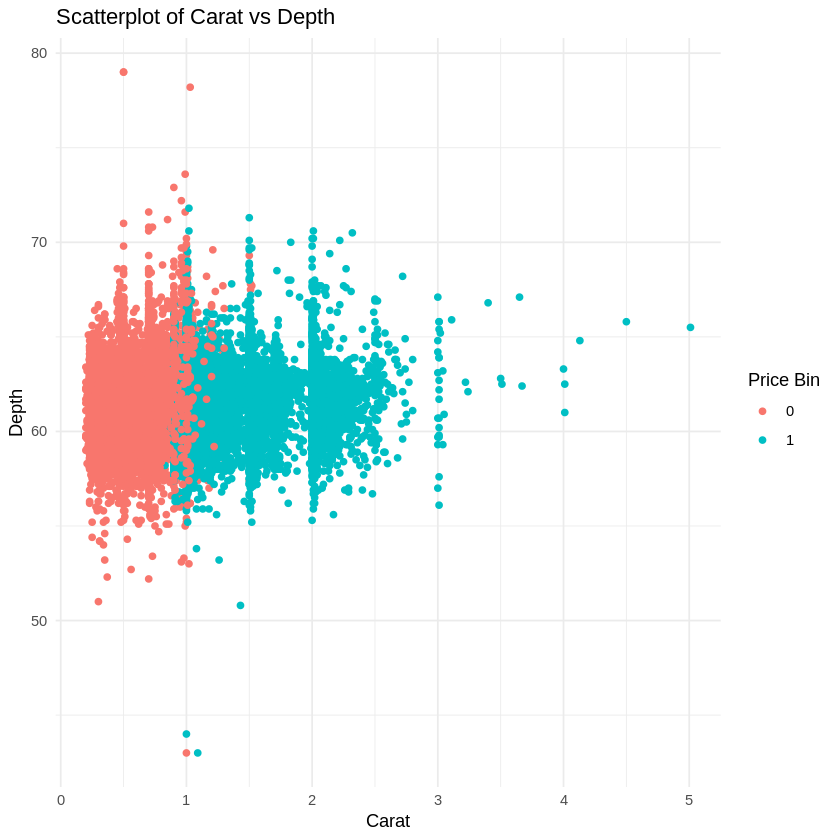

In [ ]:
ggplot(data, aes(x = carat, y = depth, color = price_bin)) +
  geom_point() +
    labs(title = 'Scatterplot of Carat vs Depth',
       x = 'Carat',
       y = 'Depth',
       color = 'Price Bin') +
  theme_minimal()

Based on the above scatterplot, how do you think kNN will perform using only these two variables to predict diabetes diagnosis? Which variable, carat or depth, gives us the most information about which price class the diamond will belong to?
> kNN may not perform very well using only the two variables because there is a lot of overlap between the points so it will ve difficult to differentiate between the two groups if there are a lot of neighbors of both groups. Carat gives more information about which price class the diamond will be in because as carat increases, price continues to extend as above the mean whereas below the mean stops around 1 carat.


### Test vs Train

Before we run KNN on these data, we need to set aside a portion of the observations as our test set. Below, randomly divide the data such that 30% are allotted to the `test` set and the rest are allotted to the `train` set. Print the first few lines of each set, and print the dimensions of each set to double check your division of the data.

In [ ]:
set.seed(2023)
test <- sample(1:nrow(data), 0.3 * nrow(data))
data$is.test <- 1:nrow(data) %in% test
train_set <- data[-test, ]
test_set <- data[test, ]
head(train_set)
dim(train_set)
head(test_set)
dim(test_set)

carat,depth,table,x,y,price_bin,is.test
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<lgl>
0.23,61.5,55,3.95,3.98,0,FALSE
0.23,56.9,65,4.05,4.07,0,FALSE
0.29,62.4,58,4.20,4.23,0,FALSE
0.31,63.3,58,4.34,4.35,0,FALSE
0.24,62.8,57,3.94,3.96,0,FALSE
0.24,62.3,57,3.95,3.98,0,FALSE


[1] 37758     7

carat,depth,table,x,y,price_bin,is.test
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<lgl>
1.22,62.3,56.0,6.81,6.84,1,TRUE
1.57,62.3,56.0,7.48,7.41,1,TRUE
1.11,62.4,57.7,6.57,6.64,1,TRUE
0.42,60.6,57.0,4.82,4.85,0,TRUE
0.32,62.6,55.0,4.39,4.36,0,TRUE
0.90,62.7,58.0,6.06,6.15,1,TRUE


[1] 16182     7

## 2: KNN (3 points)
----
Now, use the `knn()` function from the `class` library to predict `price_bin` from the `carat` and `depth`. Set `k = 3`.

*Hint: Review the format required for the arguments of knn()*

In [ ]:
set.seed(2023)
train.preds <- cbind(data$carat[-test], data$depth[-test])
train.spec <- data$price_bin[-test]
test.preds <- cbind(data$carat[test], data$depth[test])
test.spec.knn <- knn(train.preds, test.preds, train.spec, k = 3)
test.spec.knn[1:10]

[1] 1 1 1 0 0 1 1 0 0 0
Levels: 0 1

Now, output a confusion matrix and calculate the test error to evaluate model performance.

In [ ]:
confusion <- data.frame(predicted = test.spec.knn, actual = data$price_bin[test])
table(confusion)
print(paste('Accuracy:',mean(confusion$predicted == confusion$actual)))

         actual
predicted    0    1
        0 9707  316
        1  539 5620

[1] "Accuracy: 0.947163515016685"


How did your model perform?
> * Write your response here
>
> model performed well with ~95% accuracy


Let's try to improve our model by adding all of the other variables in our data set as predictors. Rerun your `knn()` below, keeping `k = 3`. Again, output a confusion matrix and error rate for your updated model fit.

In [ ]:
set.seed(2023)
train.preds_all <- cbind(data$carat[-test], data$depth[-test], data$x[-test], data$y[-test], data$table[-test])
train.spec_all <- data$price_bin[-test]
test.preds_all <- cbind(data$carat[test], data$depth[test],data$x[test], data$y[test], data$table[test])
test.spec_allknn <- knn(train.preds_all, test.preds_all, train.spec_all, k = 3)
test.spec_allknn[1:10]
confusion_all <- data.frame(predicted = test.spec_allknn, actual = data$price_bin[test])
table(confusion_all)
print(paste("Accuracy:",mean(confusion_all$predicted == confusion_all$actual)))

[1] 1 1 1 0 0 1 1 0 0 0
Levels: 0 1

         actual
predicted    0    1
        0 9728  391
        1  518 5545

[1] "Accuracy: 0.943826473859844"


Did your model predictions improve?
> No, it decreased by a very small amount.
>
>


# 3: for loop (3 points)
----

So adding additional predictors didn't shift our error much. Let's see if adjusting `k` has a larger impact on model accuracy.

Using your initial model above with just `carat` and `depth`, run a `for loop` that runs the same model 30 times, for `k = 1:30`.

Output a data frame that has `k` and the overall `error` as columns.

The structure of the output data frame and `for loop` are provided for you below. Note that your loop will take a minute or two to run because there are so many observations in the dataset. It may be helpful while you are writing and testing your loop to run it on a subset of the data with only a handful of rows.

In [ ]:
# this is provided
# setting up empty table to store for loop output
output  <- data.frame(k = seq(1:30),
                     error = rep(NA, 30))
head(output)

,k,error
,<int>,<lgl>
1,1,NA
2,2,NA
3,3,NA
4,4,NA
5,5,NA
6,6,NA


In [ ]:
for (k in seq(1:30)) {
    knn_fits  <- knn(train.preds, test.preds, train.spec, k = k)

    #overall error
    conf_df  <- data.frame(predicted = knn_fits, actual = data$price_bin[test]) # data frame of test predictions versus actual test
    output$error[k]  <- 1-mean(conf_df$predicted == conf_df$actual) #calculate error from conf_df and add to your output dataframe

}
head(output)

,k,error
,<int>,<dbl>
1,1,0.05326906
2,2,0.05376344
3,3,0.05308367
4,4,0.05333086
5,5,0.05240391
6,6,0.05252750


Create a line plot of your `output` object using `ggplot`. Add a (non-linear) `geom_smooth` layer.

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


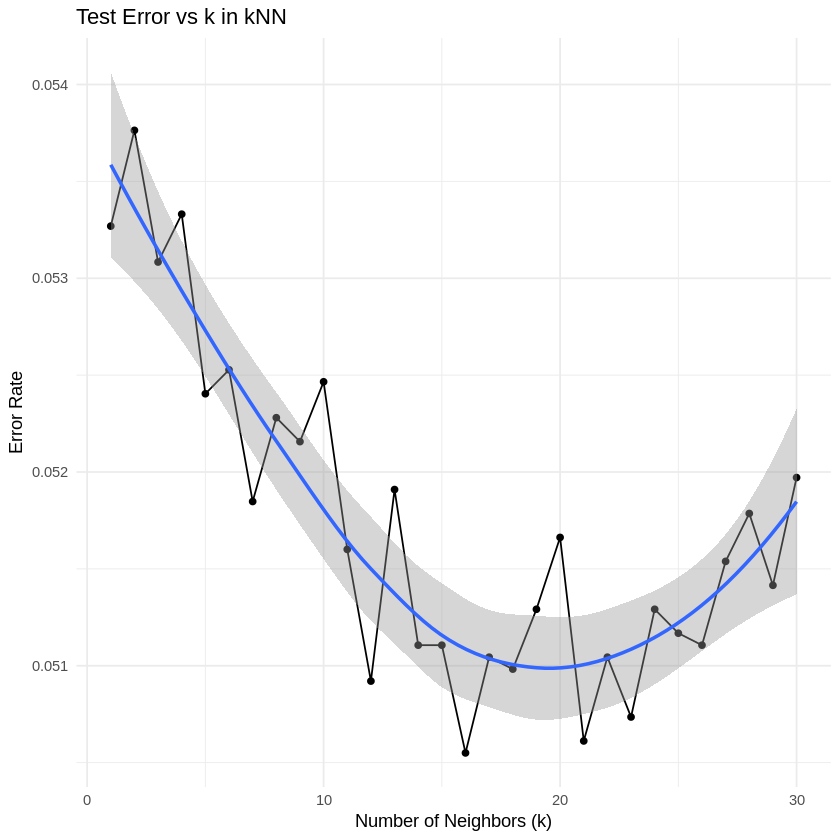

In [ ]:
ggplot(output, aes(x = k, y = error)) +
  geom_line() +
  geom_point() +
  geom_smooth() +
  labs(title = 'Test Error vs k in kNN',
       x = 'Number of Neighbors (k)',
       y = 'Error Rate') +
  theme_minimal()

Interpret your plot. What would you select as the best value of `k`? How much does this improve your test error?
> *The best value of k is 16. The test error rate decreased from an error rate of ~5.6% when k =3 to about 5%.
>
> *


# 4: Standardizing predictors (2)
-----

Because knn is based on distances between points, it is very sensitive to the scale of your variables. Looking at our predictor variables, we can see that `carat` and `depth` are orders of magnitude different in terms of scales. Maybe we can improve our fit even more by addressing this!

Below, use the `scale()` function to standardize your predictors. (Note that you don't need to standardize `price_bin`.)

Then, run your model a final time with your standardized predictors (just `carat` and `depth` still). Set `k` to the optimal value you determined in your plot above. Output the confusion matrix and error rate again.

In [ ]:
data_standard <- data %>%
  mutate(across(c(carat, depth), scale))
set.seed(2023)
train.preds_stand <- cbind(data_standard$carat[-test], data_standard$depth[-test])
train.spec_stand <- data_standard$price_bin[-test]
test.preds_stand <- cbind(data_standard$carat[test], data_standard$depth[test])

knn_standard <- knn(train.preds_stand, test.preds_stand, train.spec_stand, k = 16)
conf_stand <- data.frame(predicted = knn_standard, actual = data_standard$price_bin[test])
table(conf_stand)
print(paste('Error:', 1-mean(conf_stand$predicted == conf_stand$actual)))

         actual
predicted    0    1
        0 9722  288
        1  524 5648

[1] "Error: 0.0501792114695341"


What impact did rescaling the data have on your error rate?
> * *The error rate dropped maybe a little bit (I do not know the exact percent of the error rate with optimal k value above), but generally it did not impact much.
>
> *


**DUE:** 5pm March 20, 2024

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here.
> *Someone's Name*
>
>
